<a href="https://colab.research.google.com/github/shubhambhunia4/ML-Lab-Codes/blob/main/Linear_Regression_1(b).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("used_cars_dataset.csv")

In [ ]:
data.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,600000
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,250000
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,450000


,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,80000,Diesel,Individual,Manual,Second Owner,409999
4336,Hyundai i20 Magna 1.4 CRDi,2014,80000,Diesel,Individual,Manual,Second Owner,409999
4337,Maruti 800 AC BSIII,2009,83000,Petrol,Individual,Manual,Second Owner,110000
4338,Hyundai Creta 1.6 CRDi SX Option,2016,90000,Diesel,Individual,Manual,First Owner,865000
4339,Renault KWID RXT,2016,40000,Petrol,Individual,Manual,First Owner,225000


In [ ]:
data.isnull()

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4335,False,False,False,False,False,False,False,False
4336,False,False,False,False,False,False,False,False
4337,False,False,False,False,False,False,False,False
4338,False,False,False,False,False,False,False,False


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(np.arange(10), Y_test_preds[:10], color="blue", label="Predictions")
plt.scatter(np.arange(10), Y_test[:10], color="green", label="Actual")

plt.xlabel("name")
plt.ylabel("selling_price")
plt.title("Predictions vs Actual (First 10 Samples)")
plt.legend()
plt.show()


NameError: name 'Y_test_preds' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for first 10 points
plt.scatter(Y_test[:10], Y_test_preds[:10], label="Predictions vs Actual")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()


NameError: name 'Y_test' is not defined

In [ ]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


num_colums = ["year", "km_driven"]
cat_colums = ["name" , "fuel", "seller_type", "transmission", "owner"]
transformer = [
( "num_tag" , StandardScaler(), num_colums) ,
( "cat_tag" , OneHotEncoder(), cat_colums)


]
preprocessor = ColumnTransformer(transformer)
X = preprocessor.fit_transform(data)
Y = data["selling_price"]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   km_driven      4340 non-null   int64 
 3   fuel           4340 non-null   object
 4   seller_type    4340 non-null   object
 5   transmission   4340 non-null   object
 6   owner          4340 non-null   object
 7   selling_price  4340 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
X.shape,Y.shape, data.shape

((4340, 1508), (4340,), (4340, 8))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((3472, 1508), (868, 1508), (3472,), (868,))

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)  #training

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions on training data
Y_train_preds = model.predict(X_train)

# Calculate metrics
mse = mean_squared_error(Y_train, Y_train_preds)
mae = mean_absolute_error(Y_train, Y_train_preds)
r2 = r2_score(Y_train, Y_train_preds)

# Print results
print("Train Data:")
print("MSE :", mse)
print("MAE :", mae)
print("R2  :", r2)


Train Data:
MSE : 6115769762.28958
MAE : 40743.53903292707
R2  : 0.9822620981023763


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on test data
Y_test_preds = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(Y_test, Y_test_preds)
mae = mean_absolute_error(Y_test, Y_test_preds)
r2 = r2_score(Y_test, Y_test_preds)

# Print results
print("Test Data:")
print("MSE :", mse)
print("MAE :", mae)
print("R2  :", r2)


Test Data:
MSE : 64890514031.04914
MAE : 109257.30832675511
R2  : 0.7787981091125404


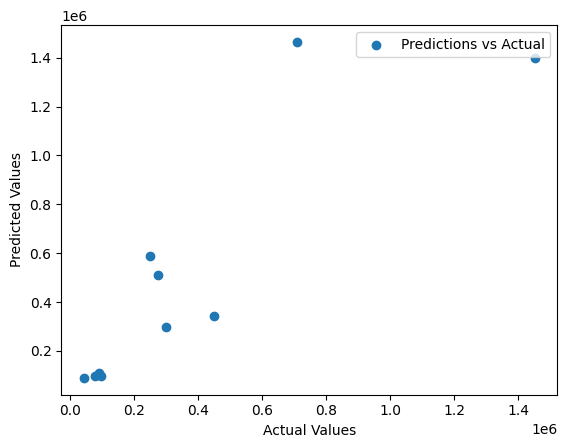

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for first 10 points
plt.scatter(Y_test[:10], Y_test_preds[:10], label="Predictions vs Actual")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()


In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("\n🔹 Linear Regression Performance")
print("MSE :", mean_squared_error(y_test, y_pred_lr))
print("MAE :", mean_absolute_error(y_test, y_pred_lr))
print("R2  :", r2_score(y_test, y_pred_lr))


NameError: name 'X_train_scaled' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ✅ Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit+transform on training data
X_test_scaled = scaler.transform(X_test)        # only transform on test data

# ✅ Train Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# ✅ Predict
y_pred_lr = lr.predict(X_test_scaled)

# ✅ Evaluate
print("\n🔹 Linear Regression Performance")
print("MSE :", mean_squared_error(y_test, y_pred_lr))
print("MAE :", mean_absolute_error(y_test, y_pred_lr))
print("R2  :", r2_score(y_test, y_pred_lr))


ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

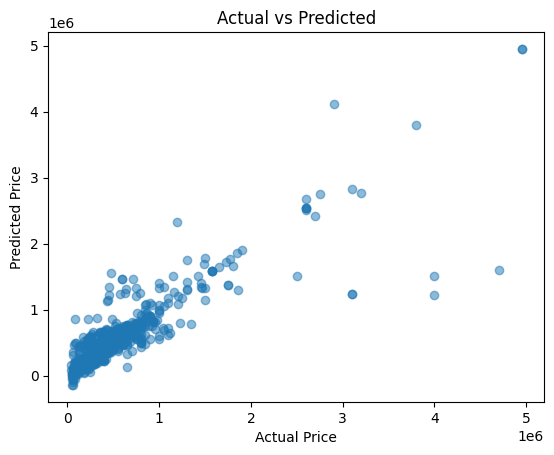

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, Y_test_preds, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='r2')
print("CV R2:", scores.mean())

CV R2: 0.7677187633105362


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
rf.fit(X_train, Y_train)
preds = rf.predict(X_test)
print("R2:", r2_score(Y_test, preds))

R2: 0.7148722589039991


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)
y_pred_poly = lr_poly.predict(X_test_poly)

print("\n🔹 Polynomial Regression (Degree=2)")
print("MSE :", mean_squared_error(y_test, y_pred_poly))
print("MAE :", mean_absolute_error(y_test, y_pred_poly))
print("R2  :", r2_score(y_test, y_pred_poly))

NameError: name 'X_train_scaled' is not defined

In [ ]:
# =========================
# 1. Scale the data first
# =========================
scaler = StandardScaler(with_mean=False)   # safe for sparse/dummy variables
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =========================
# 2. Create Polynomial Features
# =========================
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# =========================
# 3. Train Polynomial Regression
# =========================
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

y_pred_poly = lr_poly.predict(X_test_poly)

# =========================
# 4. Evaluation
# =========================
print("\n🔹 Polynomial Regression (Degree=2)")
print("MSE :", mean_squared_error(y_test, y_pred_poly))
print("MAE :", mean_absolute_error(y_test, y_pred_poly))
print("R2  :", r2_score(y_test, y_pred_poly))


NameError: name 'y_train' is not defined

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# =========================
# 1. Load dataset
# =========================
data = pd.read_csv("used_cars_dataset.csv")

# Assume target column = 'selling_price'
X = data.drop(columns=['selling_price'])
y = data['selling_price']

# Handle categorical variables
X = pd.get_dummies(X, drop_first=True)

# =========================
# 2. Train-test split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =========================
# 3. Scaling (important before polynomial expansion)
# =========================
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =========================
# 4. Polynomial Regression (degree=2)
# =========================
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

y_pred_poly = lr_poly.predict(X_test_poly)

# =========================
# 5. Evaluation
# =========================
print("\n🔹 Polynomial Regression (Degree=2)")
print("MSE :", mean_squared_error(y_test, y_pred_poly))
print("MAE :", mean_absolute_error(y_test, y_pred_poly))
print("R2  :", r2_score(y_test, y_pred_poly))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# =========================
# 1. Load dataset
# =========================
data = pd.read_csv("used_cars_dataset.csv")

# Show column names to understand dataset
print("Available columns in dataset:\n", data.columns, "\n")

# =========================
# 2. Select Features & Target
# =========================
# Target column must be selling price (adjust if named differently)
y = data["selling_price"]

# Select only numeric features (excluding selling_price)
X = data.select_dtypes(include=[np.number]).drop(columns=["selling_price"])

print("Numeric features selected for modeling:\n", X.columns, "\n")

# =========================
# 3. Train-Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =========================
# 4. Scale Features
# =========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =========================
# 5. Polynomial Features (Degree=2)
# =========================
poly = PolynomialFeatures(degree=6, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# =========================
# 6. Train Polynomial Regression
# =========================
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# =========================
# 7. Predictions
# =========================
y_pred_poly = poly_model.predict(X_test_poly)

# =========================
# 8. Evaluation
# =========================
mse = mean_squared_error(y_test, y_pred_poly)
mae = mean_absolute_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)

print("\n🔹 Polynomial Regression (Degree=2) Performance")
print("MSE :", mse)
print("MAE :", mae)
print("R2  :", r2)


Available columns in dataset:
 Index(['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'selling_price'],
      dtype='object') 

Numeric features selected for modeling:
 Index(['year', 'km_driven'], dtype='object') 


🔹 Polynomial Regression (Degree=2) Performance
MSE : 298401386192.93555
MAE : 252253.1602874329
R2  : 0.022180730563470585
